# Multiple Linear Regression
Bike Sharing Assignment

Problem Statement:

BoomBikes is a US bike-sharing provider & it aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Essentially, the company wants a model to understand the demand for shared bikes. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data.Let us first import NumPy and Pandas and read the day dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries needed for Multiple Linear Regression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
boombike= pd.read_csv("day.csv")
boombike.shape

(730, 16)

In [4]:
# Check the head of the dataset
boombike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Inspect the various aspects of the data dataframe

In [5]:
boombike.shape
# there are 730 rows & 16 columns in the dataset

(730, 16)

In [6]:
boombike.info()
# there is no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boombike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Analysing various fields from the dataset

In [8]:
boombike['weathersit'].value_counts()
# There are 3 weather situations in the dataset
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [9]:
boombike['season'].value_counts()
# season (1:spring, 2:summer, 3:fall, 4:winter)

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
boombike['yr'].value_counts()
#year (0: 2018, 1:2019)

0    365
1    365
Name: yr, dtype: int64

Checking the missing values in the dataset

In [11]:
# Check for missing values

(boombike.isna().sum()/boombike.shape[0]*100).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

No missing values

In [12]:
# Changing the format of the datetime field 'dteday' to fetch the year & month
boombike['dteday'] =  pd.to_datetime(boombike['dteday'],format='%d-%m-%Y')
boombike['dteday'].dtype

dtype('<M8[ns]')

In [13]:
boombike['year'] = pd.DatetimeIndex(boombike['dteday']).year
boombike['month'] = pd.DatetimeIndex(boombike['dteday']).month

In [14]:
boombike.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-01-02       1   0     1        0        0           0   
2        3 2018-01-03       1   0     1        0        1           1   
3        4 2018-01-04       1   0     1        0        2           1   
4        5 2018-01-05       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  year  month  
0   985  2018      1  
1   801  2018      1  
2  1349  2018      1  
3  1562  2018      1  
4  1600  2018      1

In [15]:
# Dropping the columns as we have extracte#d the correct year and month from the date.

boombike.drop(['yr','mnth'],axis=1,inplace=True)

In [16]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   holiday     730 non-null    int64         
 4   weekday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   weathersit  730 non-null    int64         
 7   temp        730 non-null    float64       
 8   atemp       730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
 14  year        730 non-null    int64         
 15  month       730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

boombike.drop('holiday',axis=1,inplace=True)

In [18]:
# Dropping the dteday,instant,casual and registered columns as they don't carry any significance.

boombike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [19]:
boombike.head()

season  weekday  workingday  weathersit       temp     atemp      hum  \
0       1        6           0           2  14.110847  18.18125  80.5833   
1       1        0           0           2  14.902598  17.68695  69.6087   
2       1        1           1           1   8.050924   9.47025  43.7273   
3       1        2           1           1   8.200000  10.60610  59.0435   
4       1        3           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  year  month  
0  10.749882   985  2018      1  
1  16.652113   801  2018      1  
2  16.636703  1349  2018      1  
3  10.739832  1562  2018      1  
4  12.522300  1600  2018      1

Adding the terms for various categorical variables

In [20]:
# Adding the terms for seasons as season (1:spring, 2:summer, 3:fall, 4:winter)
seasn = {1:'spring',2:'summer',3:'fall',4:'winter'}
boombike['season'] = boombike['season'].map(seasn)

<AxesSubplot:xlabel='season', ylabel='cnt'>

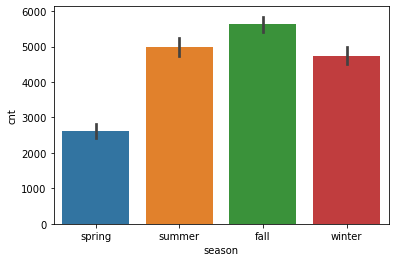

In [21]:
sns.barplot('season','cnt',data=boombike)

During fall the count is higher

In [22]:
boombike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
# Assigning values for weather as 1:'Clear',2:'Mist',3:'Light Snow'
weathr = {1:'Clear',2:'Mist',3:'Light Snow'}
boombike['weathersit'] = boombike['weathersit'].map(weathr)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

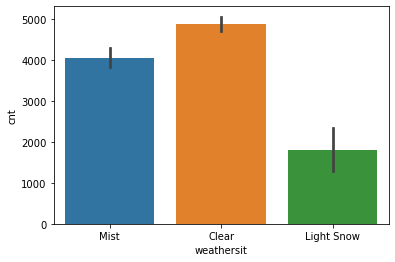

In [24]:
sns.barplot('weathersit','cnt',data=boombike)

During weather as 'Clear, Few clouds, Partly cloudy, Partly cloudy', the count is higher

In [25]:
# Check on values for working day & holiday
workday = {1:'working_day',0:'Holiday'}
boombike['workingday'] = boombike['workingday'].map(workday)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

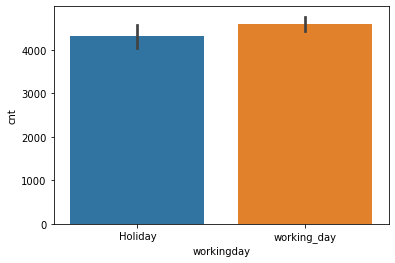

In [26]:
sns.barplot('workingday','cnt',data=boombike)

During working day, the count is higher

In [27]:
# Assigning values for year
year1 = {2019:1,2018:0}
boombike['year'] = boombike['year'].map(year1)

<AxesSubplot:xlabel='year', ylabel='cnt'>

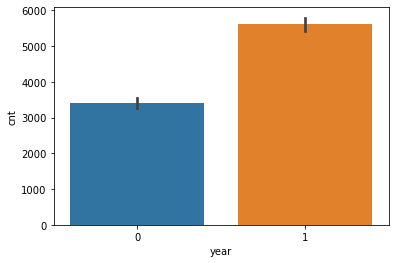

In [28]:
sns.barplot('year','cnt',data=boombike)

During year 2019, the demand for bikes was observed higher than 2018 

In [29]:
# Assigning values for various months
mnth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
boombike['month'] = boombike['month'].map(mnth)

<AxesSubplot:xlabel='month', ylabel='cnt'>

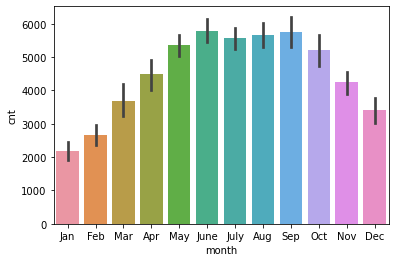

In [30]:
sns.barplot('month','cnt',data=boombike)

Demand for bikes increased during the months May to Sep

In [31]:
# Assigning values for various days of the week
weekdy = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
boombike['weekday'] = boombike['weekday'].map(weekdy)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

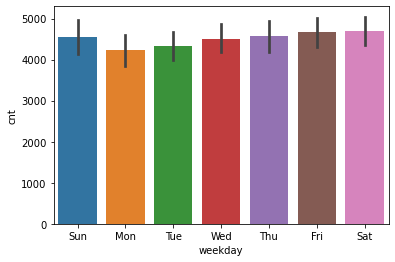

In [32]:
sns.barplot('weekday','cnt',data=boombike)

Not too much of difference however, slight increase in the need of bikes during Fri, Sat & Sun

Now, analysing the various numeric variables by drawing the scatter plot

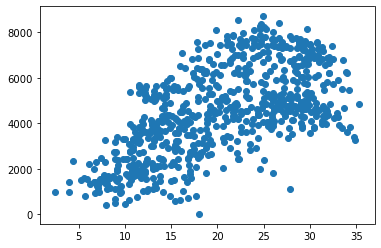

In [33]:
# temp vs count
plt.scatter('temp','cnt',data=boombike)
# more count observed at higher temperatures

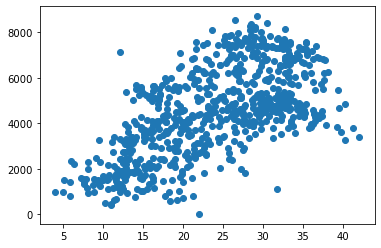

In [34]:
# adjusted temperature vs count
plt.scatter('atemp','cnt',data=boombike)
# more count observed at higher adj. temperatures & temp & adj temp. looks highly correlated

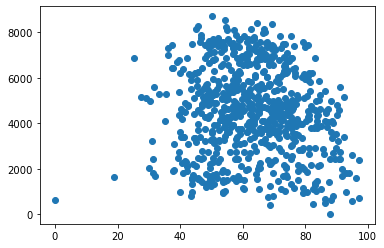

In [35]:
# humidity vs count
plt.scatter('hum','cnt',data=boombike)
# count is observed more during more humid days between 40 to 90

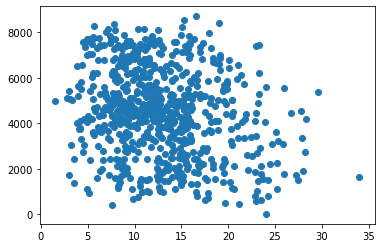

In [36]:
# windspeed vs count
plt.scatter('windspeed','cnt',data=boombike)

<AxesSubplot:>

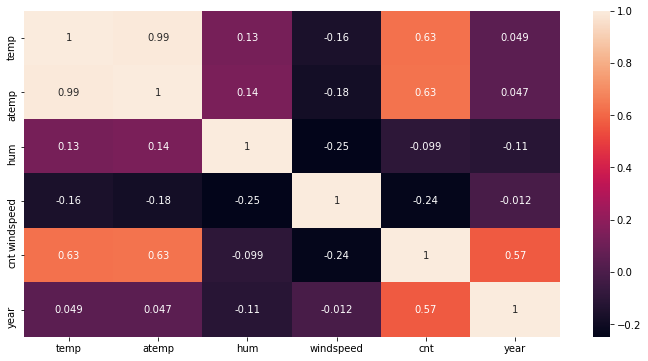

In [37]:
plt.figure(figsize = (12,6))
sns.heatmap(boombike.corr(),annot=True)

### count seems to be highly correlated to temp, adj. temp, year

### Step 2: Data Preparation
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

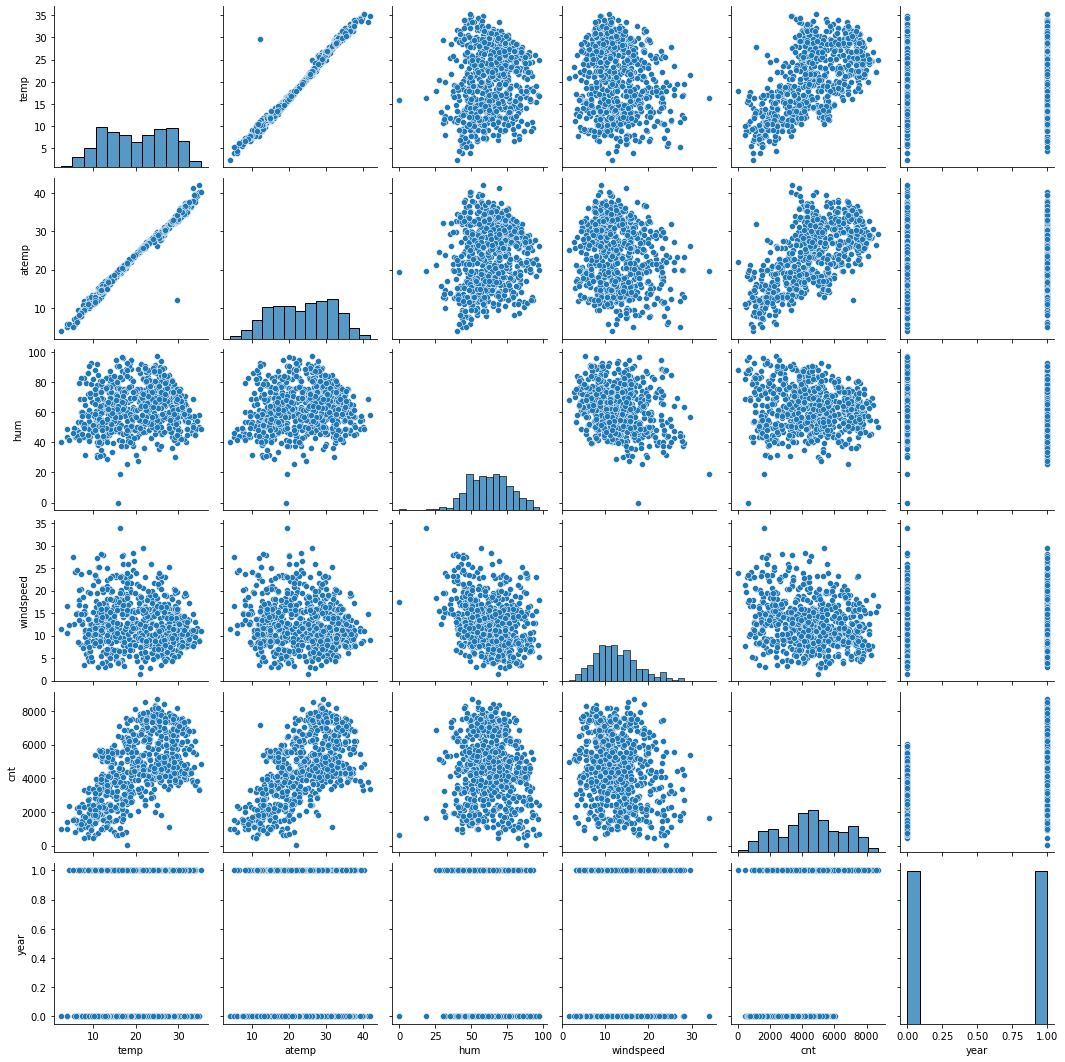

In [38]:
sns.pairplot(boombike)
plt.show()

In [39]:
# Checking the dataset after all the modification
boombike.head()

season weekday   workingday weathersit       temp     atemp      hum  \
0  spring     Sun      Holiday       Mist  14.110847  18.18125  80.5833   
1  spring     Mon      Holiday       Mist  14.902598  17.68695  69.6087   
2  spring     Tue  working_day      Clear   8.050924   9.47025  43.7273   
3  spring     Wed  working_day      Clear   8.200000  10.60610  59.0435   
4  spring     Thu  working_day      Clear   9.305237  11.46350  43.6957   

   windspeed   cnt  year month  
0  10.749882   985     0   Jan  
1  16.652113   801     0   Jan  
2  16.636703  1349     0   Jan  
3  10.739832  1562     0   Jan  
4  12.522300  1600     0   Jan

<AxesSubplot:xlabel='cnt', ylabel='Density'>

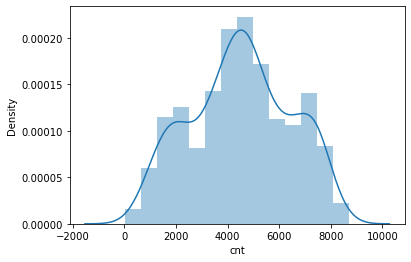

In [40]:
sns.distplot(boombike['cnt'])

In [41]:
# Adding the dummy variables to categorical values to get the meaning & avoid confusion related to interpretation of the 
# categorical values as numerical

seasons = pd.get_dummies(boombike['season'],drop_first=True)

working_day = pd.get_dummies(boombike['workingday'],drop_first=True)

weather= pd.get_dummies(boombike['weathersit'],drop_first=True)

month= pd.get_dummies(boombike['month'],drop_first=True)

week_day= pd.get_dummies(boombike['weekday'],drop_first=True)

In [42]:
# Merging the dummy variables in the main dataset
boombike= pd.concat([boombike,seasons,working_day,weather,month,week_day],axis=1)

In [43]:
# dropping the redundant fields which were used to derive dummy variables
boombike.drop(['atemp','month','season','weekday','workingday','weathersit'],axis=1,inplace=True)

In [44]:
# renaming few columns
boombike.rename(columns={'cnt':'count','hum':'humidity'},inplace=True)

In [45]:
boombike.head()

temp  humidity  windspeed  count  year  spring  summer  winter  \
0  14.110847   80.5833  10.749882    985     0       1       0       0   
1  14.902598   69.6087  16.652113    801     0       1       0       0   
2   8.050924   43.7273  16.636703   1349     0       1       0       0   
3   8.200000   59.0435  10.739832   1562     0       1       0       0   
4   9.305237   43.6957  12.522300   1600     0       1       0       0   

   working_day  Light Snow  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
0            0           0  ...    0    0    0    0    0    0    1    0    0   
1            0           0  ...    0    0    0    0    1    0    0    0    0   
2            1           0  ...    0    0    0    0    0    0    0    0    1   
3            1           0  ...    0    0    0    0    0    0    0    0    0   
4            1           0  ...    0    0    0    0    0    0    0    1    0   

   Wed  
0    0  
1    0  
2    0  
3    1  
4    0  

[5 rows x 28 columns]

### Step 3 : Splitting the Data into Training and Testing Sets
- Create bb_train & bb_test datasets
- Create train & test sets (70-30, 80-20)
- Train model on training set (i.e. learn the coefficients)
- Evaluate the model on training & test sets

In [46]:
# train-test split
np.random.seed(0)
bb_train, bb_test = train_test_split(boombike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
bb_train.shape

(510, 28)

In [48]:
bb_test.shape

(219, 28)

In [49]:
bb_train.head()

temp  humidity  windspeed  count  year  spring  summer  winter  \
653  19.201653   55.8333  12.208807   7534     1       0       0       1   
576  29.246653   70.4167  11.083475   7216     1       0       0       0   
426  16.980847   62.1250  10.792293   4066     1       1       0       0   
728  10.489153   48.3333  23.500518   1796     1       1       0       0   
482  15.443347   48.9583   8.708325   4220     1       0       1       0   

     working_day  Light Snow  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  \
653            1           0  ...    0    0    1    0    0    0    0    0   
576            1           0  ...    0    0    0    0    0    0    0    0   
426            0           0  ...    0    0    0    0    0    0    1    0   
728            0           0  ...    0    0    0    0    1    0    0    0   
482            0           0  ...    0    0    0    0    0    0    1    0   

     Tue  Wed  
653    0    1  
576    0    1  
426    0    0  
728    0    0  
482    0    0  

[5 rows x 28 columns]

### Scaling the numerical variables

In [50]:
# Rescaling of variables
# 1. Instantiate the object
scaler = MinMaxScaler()
#Create a list of numvars
num_vars = ['temp','humidity', 'windspeed','count']

# 2. Fit the data
bb_train[num_vars] = scaler.fit_transform(bb_train[num_vars])
bb_train.head()

temp  humidity  windspeed     count  year  spring  summer  winter  \
653  0.509887  0.575354   0.300794  0.864243     1       0       0       1   
576  0.815169  0.725633   0.264686  0.827658     1       0       0       0   
426  0.442393  0.640189   0.255342  0.465255     1       1       0       0   
728  0.245101  0.498067   0.663106  0.204096     1       1       0       0   
482  0.395666  0.504508   0.188475  0.482973     1       0       1       0   

     working_day  Light Snow  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  \
653            1           0  ...    0    0    1    0    0    0    0    0   
576            1           0  ...    0    0    0    0    0    0    0    0   
426            0           0  ...    0    0    0    0    0    0    1    0   
728            0           0  ...    0    0    0    0    1    0    0    0   
482            0           0  ...    0    0    0    0    0    0    1    0   

     Tue  Wed  
653    0    1  
576    0    1  
426    0    0  
728    0    0  
482    0    0  

[5 rows x 28 columns]

In [51]:
bb_train.describe()
# all numeric variables between 0 & 1

temp    humidity   windspeed       count        year      spring  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.650369    0.320768    0.513620    0.507843    0.243137   
std      0.225844    0.145882    0.169797    0.224593    0.500429    0.429398   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.538643    0.199179    0.356420    0.000000    0.000000   
50%      0.540519    0.653714    0.296763    0.518638    1.000000    0.000000   
75%      0.735215    0.754830    0.414447    0.684710    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           summer     winter  working_day  Light Snow  ...         May  \
count  510.000000  510.00000   510.000000  510.000000  ...  510.000000   
mean     0.245098    0.24902     0.676471    0.029412  ...    0.084314   
std      0.430568    0.43287     0.468282    0.169124  ...    0.278131   
min      0.000000    0.00000     0.000000    0.000000  ...    0.000000   
25%      0.000000    0.00000     0.000000    0.000000  ...    0.000000   
50%      0.000000    0.00000     1.000000    0.000000  ...    0.000000   
75%      0.000000    0.00000     1.000000    0.000000  ...    0.000000   
max      1.000000    1.00000     1.000000    1.000000  ...    1.000000   

              Nov         Oct         Sep         Mon         Sat         Sun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.080392    0.143137    0.127451    0.154902   
std      0.281045    0.281045    0.272166    0.350557    0.333805    0.362166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Thu         Tue         Wed  
count  510.000000  510.000000  510.000000  
mean     0.158824    0.150980    0.131373  
std      0.365870    0.358381    0.338139  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

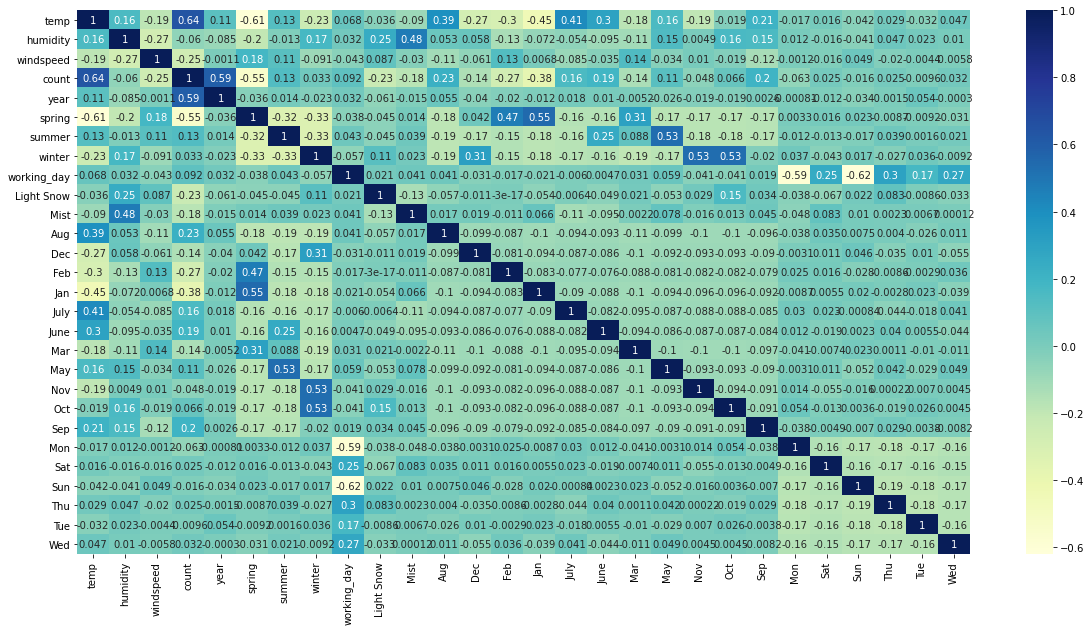

In [52]:
#heatmap - Checking the coorelation between various variables for training dataset
plt.figure(figsize = (20, 10))
sns.heatmap(bb_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It looks like that count is having high coorelation with 'temp','year','Aug','June','July' fields

In [53]:
# X_train,y_train
y_train = bb_train.pop('count')
X_train = bb_train

In [54]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

# Building a Linear Model

### Method 1 : Bottom-Up approach for building the model by using one variable at a time & adding more variables to the model 

In [55]:
# As temp has the highest correlation to count, lets start building the model with temp
# add a constant
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params


const    0.169798
temp     0.639952
dtype: float64

In [56]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           5.80e-61
Time:                        18:52:02   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# add another variable year to the model
X_train_sm = X_train[['temp','year']]
X_train_sm = sm.add_constant(X_train_sm)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const    0.079628
temp     0.583559
year     0.237213
dtype: float64

In [58]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          9.25e-130
Time:                        18:52:02   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
year           0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The model is improved after using 2 variables temp & year

In [59]:
# add 3rd variable to the model
X_train_sm = X_train[['temp','year','Aug']]
X_train_sm = sm.add_constant(X_train_sm)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const    0.074968
temp     0.596699
year     0.237419
Aug     -0.026061
dtype: float64

In [60]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.10e-128
Time:                        18:52:02   Log-Likelihood:                 338.20
No. Observations:                 510   AIC:                            -668.4
Df Residuals:                     506   BIC:                            -651.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.015      4.878      0.000       0.045       0.105
temp           0.5967      0.027     22.296      0.000       0.544       0.649
year           0.2374      0.011     21.290      0.000       0.216       0.259
Aug           -0.0261      0.020     -1.277      0.202      -0.066       0.014
==============================================================================
Omnibus:                       33.306   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.257
Skew:                          -0.527   Prob(JB):                     1.49e-10
Kurtosis:                       4.009   Cond. No.                         7.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model improved even further with 3 variables temp, year & Aug

In [61]:
# add few more variables
X_train_sm = X_train[['temp','year','Aug','June','July']]
X_train_sm = sm.add_constant(X_train_sm)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const    0.038234
temp     0.700060
year     0.235356
Aug     -0.071353
June    -0.044748
July    -0.131616
dtype: float64

In [62]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     243.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.39e-132
Time:                        18:52:02   Log-Likelihood:                 351.95
No. Observations:                 510   AIC:                            -691.9
Df Residuals:                     504   BIC:                            -666.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0382      0.017      2.273      0.023       0.005       0.071
temp           0.7001      0.034     20.533      0.000       0.633       0.767
year           0.2354      0.011     21.621      0.000       0.214       0.257
Aug           -0.0714      0.022     -3.219      0.001      -0.115      -0.028
June          -0.0447      0.024     -1.894      0.059      -0.091       0.002
July          -0.1316      0.025     -5.284      0.000      -0.181      -0.083
==============================================================================
Omnibus:                       44.255   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.817
Skew:                          -0.620   Prob(JB):                     5.10e-15
Kurtosis:                       4.248   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model improved even further with 5 variables temp, year, Aug, Jun, Jul

In [63]:
# add another variable
X_train_sm = X_train[['temp','year','Aug','July','June','summer','Dec']]
X_train_sm = sm.add_constant(X_train_sm)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const     0.028028
temp      0.707141
year      0.235592
Aug      -0.066989
July     -0.127639
June     -0.046368
summer    0.009803
Dec       0.038865
dtype: float64

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     175.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.00e-130
Time:                        18:52:02   Log-Likelihood:                 353.88
No. Observations:                 510   AIC:                            -691.8
Df Residuals:                     502   BIC:                            -657.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.018      1.582      0.114      -0.007       0.063
temp           0.7071      0.036     19.593      0.000       0.636       0.778
year           0.2356      0.011     21.680      0.000       0.214       0.257
Aug           -0.0670      0.023     -2.870      0.004      -0.113      -0.021
July          -0.1276      0.026     -4.886      0.000      -0.179      -0.076
June          -0.0464      0.024     -1.960      0.051      -0.093       0.000
summer         0.0098      0.014      0.694      0.488      -0.018       0.038
Dec            0.0389      0.020      1.903      0.058      -0.001       0.079
==============================================================================
Omnibus:                       46.598   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.973
Skew:                          -0.637   Prob(JB):                     3.88e-16
Kurtosis:                       4.310   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So, the above was Method 1 by using one variable at a time to build the model, now, lets try method 2

## Method 2 : Top-Down approach for building the model by using all variable at once  & dropping variables gradually to improve the model

In [65]:
# another method : Build a model by adding all the variables
X_train_sm = sm.add_constant(X_train)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const          0.245807
temp           0.450562
humidity      -0.151340
windspeed     -0.186453
year           0.232116
spring        -0.048159
summer         0.038725
winter         0.105847
working_day    0.086925
Light Snow    -0.257443
Mist          -0.061066
Aug            0.014404
Dec           -0.045586
Feb           -0.032282
Jan           -0.062777
July          -0.040350
June          -0.002972
Mar            0.001045
May            0.023940
Nov           -0.041851
Oct            0.007534
Sep            0.081060
Mon            0.041131
Sat            0.009237
Sun            0.095667
Thu            0.003849
Tue           -0.011670
Wed           -0.009653
dtype: float64

In [66]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          8.74e-182
Time:                        18:52:02   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2458      0.052      4.718      0.000       0.143       0.348
temp            0.4506      0.046      9.734      0.000       0.360       0.542
humidity       -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed      -0.1865      0.026     -7.257      0.000      -0.237      -0.136
year            0.2321      0.008     28.820      0.000       0.216       0.248
spring         -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer          0.0387      0.026      1.478      0.140      -0.013       0.090
winter          0.1058      0.028      3.794      0.000       0.051       0.161
working_day     0.0869      0.027      3.269      0.001       0.035       0.139
Light Snow     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist           -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Aug             0.0144      0.034      0.428      0.669      -0.052       0.081
Dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
July           -0.0404      0.035     -1.151      0.250      -0.109       0.029
June           -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar             0.0010      0.025      0.043      0.966      -0.047       0.049
May             0.0239      0.021      1.140      0.255      -0.017       0.065
Nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct             0.0075      0.036      0.211      0.833      -0.063       0.078
Sep             0.0811      0.032      2.533      0.012       0.018       0.144
Mon             0.0411      0.030      1.372      0.171      -0.018       0.100
Sat             0.0092      0.016      0.595      0.552      -0.021       0.040
Sun             0.0957      0.030      3.202      0.001       0.037       0.154
Thu             0.0038      0.015      0.263      0.793      -0.025       0.033
Tue            -0.0117      0.015     -0.773      0.440      -0.041       0.018
Wed            -0.0097      0.015     -0.627      0.531      -0.040       0.021
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The output from top-down approach looks better than bottom-up approach

In [67]:
# 2 factors to decide on dropping the variables 
#Analyse the significance (p-value) of the variables
#VIF : Higher VIF can be dropped first
# Cases 1. High P High VIF 2. High P Low VIF Low P High VIF 3. Low VIF Low P

## Calculating VIF

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      humidity  39.66
0          temp  38.44
7   working_day  22.50
4        spring  12.43
6        winter  12.20
5        summer   7.94
19          Oct   6.49
23          Sun   6.47
10          Aug   6.31
18          Nov   6.07
21          Mon   6.05
14         July   5.60
13          Jan   5.44
2     windspeed   5.25
11          Dec   5.11
20          Sep   4.50
12          Feb   4.10
16          Mar   3.50
15         June   3.00
17          May   2.43
9          Mist   2.39
24          Thu   2.19
3          year   2.15
25          Tue   2.12
26          Wed   2.01
22          Sat   1.95
8    Light Snow   1.32

In [69]:
#Dropping June, Mar, Oct, Thu as they have very high P-Value 
X = X_train.drop(['June', 'Mar', 'Oct', 'Thu'],axis =1)

In [70]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const          0.250037
temp           0.446124
humidity      -0.149139
windspeed     -0.185784
year           0.232198
spring        -0.047390
summer         0.037362
winter         0.110770
working_day    0.086406
Light Snow    -0.257204
Mist          -0.061198
Aug            0.014688
Dec           -0.051204
Feb           -0.034902
Jan           -0.065793
July          -0.039762
May            0.024938
Nov           -0.048449
Sep            0.079648
Mon            0.038525
Sat            0.007186
Sun            0.093012
Tue           -0.013835
Wed           -0.011696
dtype: float64

In [71]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          6.82e-186
Time:                        18:52:03   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2500      0.048      5.184      0.000       0.155       0.345
temp            0.4461      0.038     11.634      0.000       0.371       0.521
humidity       -0.1491      0.038     -3.958      0.000      -0.223      -0.075
windspeed      -0.1858      0.025     -7.315      0.000      -0.236      -0.136
year            0.2322      0.008     29.113      0.000       0.217       0.248
spring         -0.0474      0.027     -1.783      0.075      -0.100       0.005
summer          0.0374      0.023      1.608      0.109      -0.008       0.083
winter          0.1108      0.023      4.900      0.000       0.066       0.155
working_day     0.0864      0.026      3.285      0.001       0.035       0.138
Light Snow     -0.2572      0.026     -9.813      0.000      -0.309      -0.206
Mist           -0.0612      0.010     -5.899      0.000      -0.082      -0.041
Aug             0.0147      0.024      0.623      0.533      -0.032       0.061
Dec            -0.0512      0.018     -2.827      0.005      -0.087      -0.016
Feb            -0.0349      0.021     -1.633      0.103      -0.077       0.007
Jan            -0.0658      0.021     -3.105      0.002      -0.107      -0.024
July           -0.0398      0.025     -1.617      0.106      -0.088       0.009
May             0.0249      0.017      1.441      0.150      -0.009       0.059
Nov            -0.0484      0.019     -2.576      0.010      -0.085      -0.011
Sep             0.0796      0.021      3.724      0.000       0.038       0.122
Mon             0.0385      0.029      1.332      0.184      -0.018       0.095
Sat             0.0072      0.013      0.542      0.588      -0.019       0.033
Sun             0.0930      0.029      3.227      0.001       0.036       0.150
Tue            -0.0138      0.013     -1.077      0.282      -0.039       0.011
Wed            -0.0117      0.013     -0.894      0.372      -0.037       0.014
==============================================================================
Omnibus:                       84.376   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.712
Skew:                          -0.802   Prob(JB):                     6.54e-52
Kurtosis:                       5.919   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      humidity  36.38
0          temp  24.20
7   working_day  20.88
4        spring   8.38
6        winter   6.75
5        summer   6.67
20          Sun   5.88
18          Mon   5.55
2     windspeed   5.13
10          Aug   3.27
14         July   2.90
13          Jan   2.44
9          Mist   2.37
17          Sep   2.19
3          year   2.12
12          Feb   1.94
16          Nov   1.83
11          Dec   1.71
15          May   1.62
21          Tue   1.56
22          Wed   1.47
19          Sat   1.45
8    Light Snow   1.32

In [73]:
#Dropping Aug, Sat as they have very high P-Value 
X = X.drop(['Aug', 'Sat'],axis =1)

In [74]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

const          0.261085
temp           0.447440
humidity      -0.148710
windspeed     -0.185937
year           0.232295
spring        -0.057091
summer         0.027143
winter         0.102082
working_day    0.086481
Light Snow    -0.258957
Mist          -0.060520
Dec           -0.052032
Feb           -0.034706
Jan           -0.065861
July          -0.049878
May            0.024705
Nov           -0.050043
Sep            0.070970
Mon            0.036283
Sun            0.091202
Tue           -0.016135
Wed           -0.013769
dtype: float64

In [75]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          7.12e-188
Time:                        18:52:03   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2611      0.046      5.658      0.000       0.170       0.352
temp            0.4474      0.038     11.717      0.000       0.372       0.522
humidity       -0.1487      0.038     -3.958      0.000      -0.223      -0.075
windspeed      -0.1859      0.025     -7.332      0.000      -0.236      -0.136
year            0.2323      0.008     29.179      0.000       0.217       0.248
spring         -0.0571      0.022     -2.613      0.009      -0.100      -0.014
summer          0.0271      0.017      1.606      0.109      -0.006       0.060
winter          0.1021      0.018      5.756      0.000       0.067       0.137
working_day     0.0865      0.026      3.293      0.001       0.035       0.138
Light Snow     -0.2590      0.026     -9.927      0.000      -0.310      -0.208
Mist           -0.0605      0.010     -5.864      0.000      -0.081      -0.040
Dec            -0.0520      0.018     -2.882      0.004      -0.088      -0.017
Feb            -0.0347      0.021     -1.626      0.105      -0.077       0.007
Jan            -0.0659      0.021     -3.113      0.002      -0.107      -0.024
July           -0.0499      0.018     -2.782      0.006      -0.085      -0.015
May             0.0247      0.017      1.430      0.153      -0.009       0.059
Nov            -0.0500      0.019     -2.679      0.008      -0.087      -0.013
Sep             0.0710      0.017      4.276      0.000       0.038       0.104
Mon             0.0363      0.029      1.271      0.204      -0.020       0.092
Sun             0.0912      0.028      3.210      0.001       0.035       0.147
Tue            -0.0161      0.012     -1.327      0.185      -0.040       0.008
Wed            -0.0138      0.012     -1.110      0.267      -0.038       0.011
==============================================================================
Omnibus:                       85.200   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.415
Skew:                          -0.809   Prob(JB):                     1.69e-52
Kurtosis:                       5.933   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      humidity  35.53
0          temp  22.61
7   working_day  19.86
4        spring   6.09
18          Sun   5.52
17          Mon   5.30
2     windspeed   5.09
6        winter   4.45
5        summer   3.75
12          Jan   2.43
9          Mist   2.36
3          year   2.12
11          Feb   1.93
15          Nov   1.83
10          Dec   1.71
13         July   1.62
14          May   1.61
16          Sep   1.41
19          Tue   1.41
20          Wed   1.33
8    Light Snow   1.30

In [77]:
#Dropping other variables with high p-value 
X = X.drop(['Mon','Tue','Wed','Feb','May'],axis =1)

In [78]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.53e-191
Time:                        18:52:03   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2694      0.037      7.286      0.000       0.197       0.342
temp            0.4729      0.037     12.953      0.000       0.401       0.545
humidity       -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed      -0.1880      0.025     -7.384      0.000      -0.238      -0.138
year            0.2310      0.008     28.956      0.000       0.215       0.247
spring         -0.0628      0.021     -2.999      0.003      -0.104      -0.022
summer          0.0406      0.015      2.683      0.008       0.011       0.070
winter          0.1052      0.018      5.935      0.000       0.070       0.140
working_day     0.0522      0.011      4.847      0.000       0.031       0.073
Light Snow     -0.2568      0.026     -9.826      0.000      -0.308      -0.205
Mist           -0.0596      0.010     -5.749      0.000      -0.080      -0.039
Dec            -0.0415      0.017     -2.405      0.017      -0.075      -0.008
Jan            -0.0468      0.018     -2.617      0.009      -0.082      -0.012
July           -0.0516      0.018     -2.870      0.004      -0.087      -0.016
Nov            -0.0462      0.018     -2.517      0.012      -0.082      -0.010
Sep             0.0708      0.017      4.263      0.000       0.038       0.103
Sun             0.0627      0.014      4.513      0.000       0.035       0.090
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1      humidity  31.14
0          temp  18.94
2     windspeed   4.77
7   working_day   4.76
4        spring   4.50
6        winter   4.11
5        summer   2.86
9          Mist   2.32
3          year   2.09
15          Sun   1.86
13          Nov   1.81
11          Jan   1.76
12         July   1.59
10          Dec   1.56
14          Sep   1.41
8    Light Snow   1.28

In [80]:
#Dropping Registered as it has very high VIF 
X = X.drop(['humidity'],axis =1)

In [81]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.71e-189
Time:                        18:52:03   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1999      0.033      6.084      0.000       0.135       0.264
temp            0.4344      0.036     12.184      0.000       0.364       0.504
windspeed      -0.1610      0.025     -6.479      0.000      -0.210      -0.112
year            0.2346      0.008     29.196      0.000       0.219       0.250
spring         -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer          0.0338      0.015      2.219      0.027       0.004       0.064
winter          0.0919      0.018      5.209      0.000       0.057       0.127
working_day     0.0548      0.011      5.027      0.000       0.033       0.076
Light Snow     -0.2980      0.024    -12.291      0.000      -0.346      -0.250
Mist           -0.0831      0.009     -9.686      0.000      -0.100      -0.066
Dec            -0.0483      0.017     -2.778      0.006      -0.083      -0.014
Jan            -0.0528      0.018     -2.924      0.004      -0.088      -0.017
July           -0.0469      0.018     -2.575      0.010      -0.083      -0.011
Nov            -0.0469      0.019     -2.518      0.012      -0.083      -0.010
Sep             0.0648      0.017      3.859      0.000       0.032       0.098
Sun             0.0671      0.014      4.777      0.000       0.040       0.095
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0          temp  6.92
6   working_day  4.73
1     windspeed  4.71
3        spring  3.09
5        winter  3.02
4        summer  2.32
2          year  2.08
14          Sun  1.86
12          Nov  1.78
10          Jan  1.67
11         July  1.59
8          Mist  1.57
9           Dec  1.48
13          Sep  1.35
7    Light Snow  1.09

In [83]:
#Dropping working_day as it has a high VIF 
X = X.drop('working_day',axis =1)

In [84]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          8.80e-185
Time:                        18:52:04   Log-Likelihood:                 501.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     495   BIC:                            -909.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.032      7.527      0.000       0.180       0.308
temp           0.4363      0.037     11.949      0.000       0.365       0.508
windspeed     -0.1625      0.025     -6.384      0.000      -0.212      -0.112
year           0.2352      0.008     28.574      0.000       0.219       0.251
spring        -0.0749      0.022     -3.463      0.001      -0.117      -0.032
summer         0.0329      0.016      2.109      0.035       0.002       0.064
winter         0.0878      0.018      4.862      0.000       0.052       0.123
Light Snow    -0.2905      0.025    -11.719      0.000      -0.339      -0.242
Mist          -0.0802      0.009     -9.150      0.000      -0.097      -0.063
Dec           -0.0468      0.018     -2.624      0.009      -0.082      -0.012
Jan           -0.0522      0.019     -2.818      0.005      -0.089      -0.016
July          -0.0499      0.019     -2.679      0.008      -0.087      -0.013
Nov           -0.0491      0.019     -2.575      0.010      -0.087      -0.012
Sep            0.0639      0.017      3.718      0.000       0.030       0.098
Sun            0.0233      0.011      2.063      0.040       0.001       0.045
==============================================================================
Omnibus:                       86.927   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.610
Skew:                          -0.858   Prob(JB):                     1.24e-48
Kurtosis:                       5.727   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         temp  5.19
1    windspeed  4.69
5       winter  2.94
3       spring  2.88
4       summer  2.23
2         year  2.07
11         Nov  1.77
9          Jan  1.66
10        July  1.59
7         Mist  1.56
8          Dec  1.46
12         Sep  1.35
13         Sun  1.19
6   Light Snow  1.09

In [86]:
#Dropping Registered as it has very high VIF 
X = X.drop(['summer'],axis =1)

In [87]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.60e-185
Time:                        18:52:04   Log-Likelihood:                 499.16
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     496   BIC:                            -911.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2864      0.026     11.198      0.000       0.236       0.337
temp           0.4016      0.033     12.279      0.000       0.337       0.466
windspeed     -0.1579      0.025     -6.206      0.000      -0.208      -0.108
year           0.2357      0.008     28.547      0.000       0.219       0.252
spring        -0.1063      0.016     -6.754      0.000      -0.137      -0.075
winter         0.0644      0.014      4.507      0.000       0.036       0.092
Light Snow    -0.2924      0.025    -11.767      0.000      -0.341      -0.244
Mist          -0.0799      0.009     -9.092      0.000      -0.097      -0.063
Dec           -0.0531      0.018     -3.015      0.003      -0.088      -0.019
Jan           -0.0574      0.018     -3.122      0.002      -0.094      -0.021
July          -0.0638      0.018     -3.642      0.000      -0.098      -0.029
Nov           -0.0559      0.019     -2.968      0.003      -0.093      -0.019
Sep            0.0495      0.016      3.128      0.002       0.018       0.081
Sun            0.0231      0.011      2.038      0.042       0.001       0.045
==============================================================================
Omnibus:                       87.815   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.663
Skew:                          -0.853   Prob(JB):                     4.95e-51
Kurtosis:                       5.826   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         temp  4.70
1    windspeed  4.08
4       winter  2.54
3       spring  2.36
2         year  2.07
10         Nov  1.77
8          Jan  1.65
6         Mist  1.53
7          Dec  1.46
9         July  1.36
11         Sep  1.21
12         Sun  1.19
5   Light Snow  1.09

In [89]:
#Dropping Registered as it has very high VIF 
X = X.drop(['Sun'],axis =1)

In [90]:
#create model after dropping
X_train_sm = sm.add_constant(X)
#create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

#params
lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.97e-185
Time:                        18:52:04   Log-Likelihood:                 497.03
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     497   BIC:                            -913.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2896      0.026     11.309      0.000       0.239       0.340
temp           0.4007      0.033     12.214      0.000       0.336       0.465
windspeed     -0.1554      0.025     -6.093      0.000      -0.205      -0.105
year           0.2352      0.008     28.410      0.000       0.219       0.251
spring        -0.1064      0.016     -6.742      0.000      -0.137      -0.075
winter         0.0647      0.014      4.520      0.000       0.037       0.093
Light Snow    -0.2917      0.025    -11.701      0.000      -0.341      -0.243
Mist          -0.0798      0.009     -9.043      0.000      -0.097      -0.062
Dec           -0.0520      0.018     -2.944      0.003      -0.087      -0.017
Jan           -0.0569      0.018     -3.081      0.002      -0.093      -0.021
July          -0.0631      0.018     -3.594      0.000      -0.098      -0.029
Nov           -0.0567      0.019     -3.000      0.003      -0.094      -0.020
Sep            0.0497      0.016      3.132      0.002       0.019       0.081
==============================================================================
Omnibus:                       80.983   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.371
Skew:                          -0.773   Prob(JB):                     1.90e-49
Kurtosis:                       5.858   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         temp  4.66
1    windspeed  4.05
4       winter  2.54
3       spring  2.35
2         year  2.06
10         Nov  1.77
8          Jan  1.65
6         Mist  1.53
7          Dec  1.46
9         July  1.36
11         Sep  1.21
5   Light Snow  1.09

# Residual Analysis

In [92]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

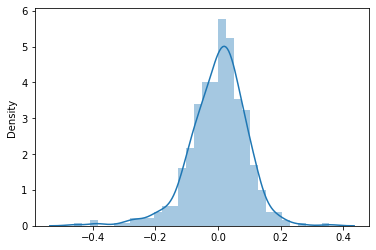

In [93]:
res = y_train - y_train_pred
sns.distplot(res)

# Predictions & Evaluation on the test set

In [94]:
# Rescaling of variables
# 1. Instantiate the object
#scaler = MinMaxScaler()
#Create a list of numvars
num_vars = ['temp','humidity', 'windspeed','count']

# 2. Fit the data
bb_test[num_vars] = scaler.transform(bb_test[num_vars])
bb_test.head()

temp  humidity  windspeed     count  year  spring  summer  winter  \
184  0.831783  0.657364   0.084219  0.692706     0       0       0       0   
535  0.901354  0.610133   0.153728  0.712034     1       0       1       0   
299  0.511964  0.837699   0.334206  0.303382     0       0       0       1   
221  0.881625  0.437098   0.339570  0.547400     0       0       0       0   
152  0.817246  0.314298   0.537414  0.569029     0       0       1       0   

     working_day  Light Snow  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  \
184            0           0  ...    0    0    0    0    0    0    0    0   
535            1           0  ...    0    0    0    0    0    0    0    1   
299            1           0  ...    0    0    1    0    0    0    0    0   
221            1           0  ...    0    0    0    0    0    0    0    1   
152            1           0  ...    0    0    0    0    0    0    0    0   

     Tue  Wed  
184    1    0  
535    0    0  
299    0    0  
221    0    0  
152    0    0  

[5 rows x 28 columns]

In [95]:
y_test = bb_test.pop('count')
X_test = bb_test

In [96]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [97]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['June', 'Mar', 'Oct', 'Thu','Aug', 'Sat','Mon','Tue','Wed','Feb','May','humidity','working_day','summer','Sun'], axis = 1)

In [98]:
# Making predictions using the fourth model

y_pred_m4 = lr_model.predict(X_test_m4)

# Model Evaluation

In [99]:
r2_score(y_true=y_test,y_pred=y_pred_m4)

0.8162499322886151

Text(0, 0.5, 'y_pred')

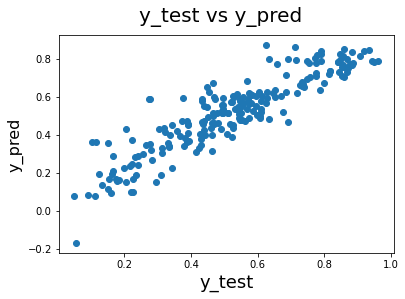

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# End of file